In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics.pairwise import euclidean_distances

In [27]:
from sklearn.cluster import \
(KMeans,AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram,linkage,cut_tree)
from sklearn.datasets import make_blobs

Clustering and dimensionality reduction

In [28]:
wine = pd.read_csv(r'wine.csv')
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [29]:
features = wine.iloc[:, 0:11]
features.mean()

fixed.acidity             7.215307
volatile.acidity          0.339666
citric.acid               0.318633
residual.sugar            5.443235
chlorides                 0.056034
free.sulfur.dioxide      30.525319
total.sulfur.dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
dtype: float64

In [30]:
features.var()

fixed.acidity              1.680740
volatile.acidity           0.027105
citric.acid                0.021117
residual.sugar            22.636696
chlorides                  0.001227
free.sulfur.dioxide      315.041192
total.sulfur.dioxide    3194.720039
density                    0.000009
pH                         0.025853
sulphates                  0.022143
alcohol                    1.422561
dtype: float64

- Because the characteristics of the features have very different average values and ranges, we adjust the data using a process called StandardScaler.
- StandardScaler makes the wine data more comparable by adjusting each variable values so they all have a similar scale, helping the analysis to consider each feature equally.

In [31]:
scaler = StandardScaler()
wine_scaled_df = scaler.fit_transform(features)

PCA- Color

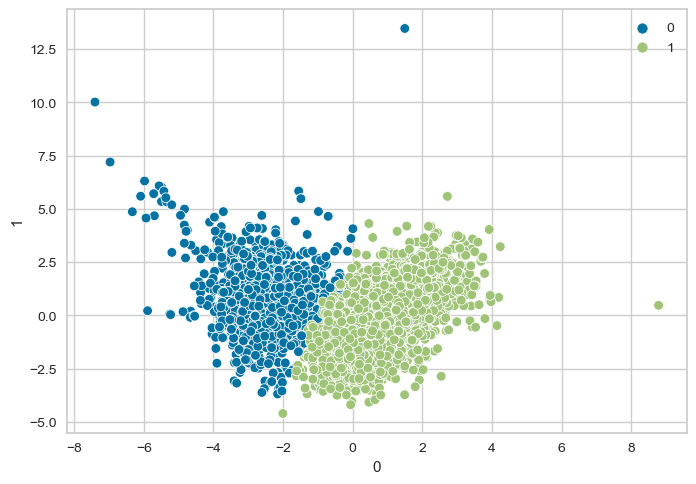

In [32]:
df_pca = pd.DataFrame(PCA(4).fit_transform(wine_scaled_df))
kmeans = KMeans(n_clusters = 2, random_state = 1, n_init = 30)
kmeans.fit(df_pca)
pca_labels = kmeans.labels_
sns.scatterplot(data = df_pca, x = df_pca.iloc[:, 0],y = df_pca.iloc[:, 1], hue = pca_labels)
plt.show()

In [33]:
wine['cluster_pca']=pca_labels

wine['cluster_pca'] = wine['cluster_pca'].replace(0, 'red')
wine['cluster_pca'] = wine['cluster_pca'].replace(1, 'white')

wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color,cluster_pca
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,red


In [34]:
accuracy = (wine['color'] == wine['cluster_pca']).sum()/wine['color'].count()
accuracy

0.9839926119747576

The accuracy of K Means Clustering after PCA is 98.4%.

t-SNE - Color

In [35]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(wine_scaled_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.005s...
[t-SNE] Computed neighbors for 6497 samples in 0.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.147110
[t-SNE] KL divergence after 1000 iterations: 1.407285


In [36]:
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

tsne_df['color'] = wine['color'].values

fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='color')
fig.show()

PCA - Quality

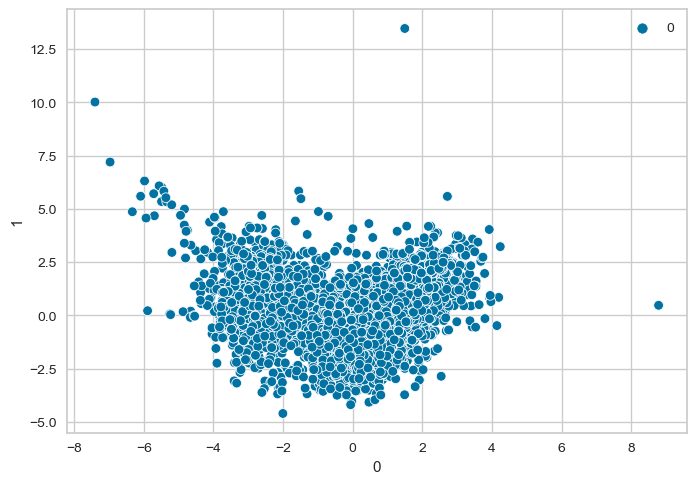

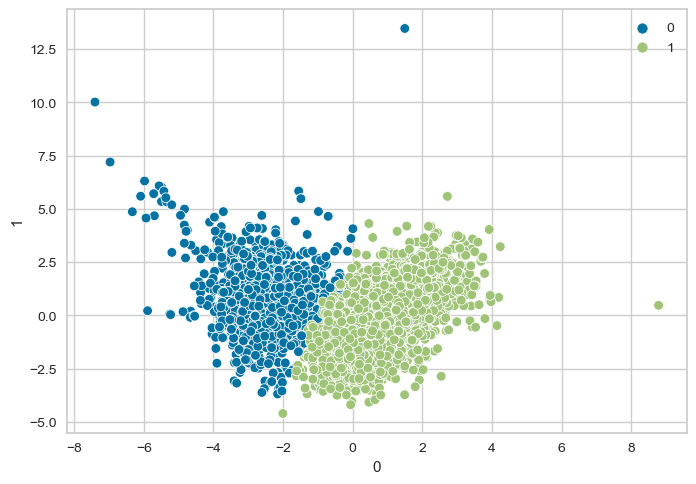

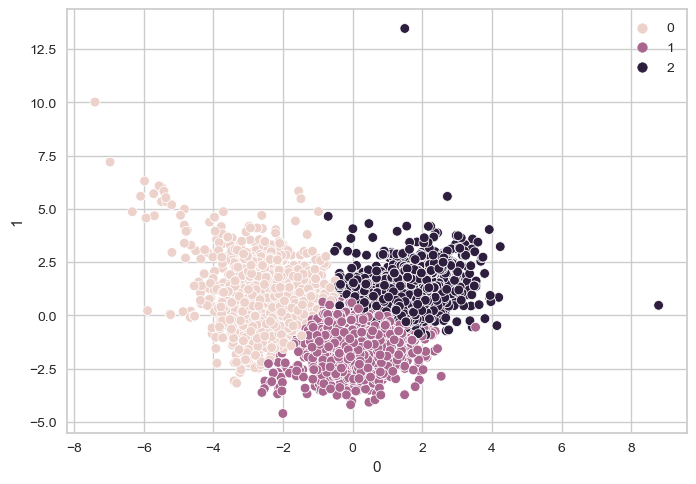

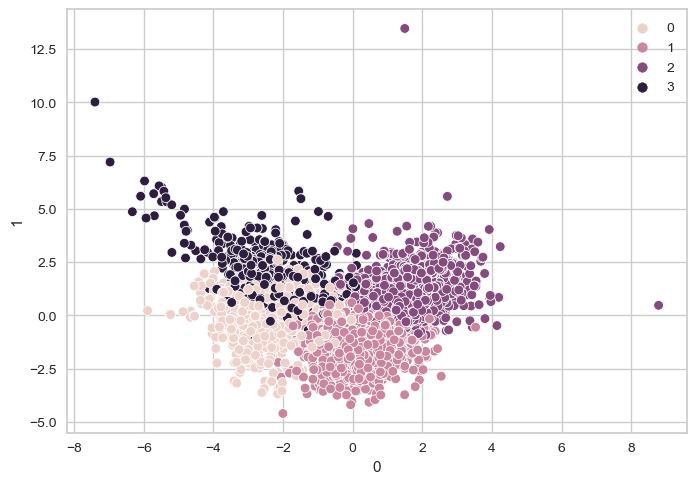

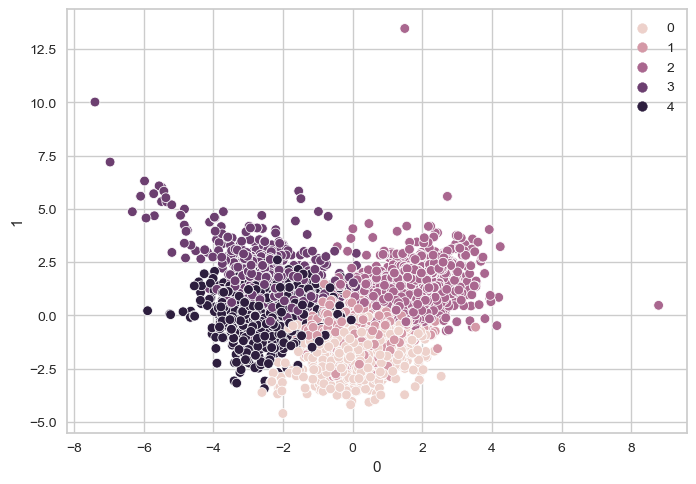

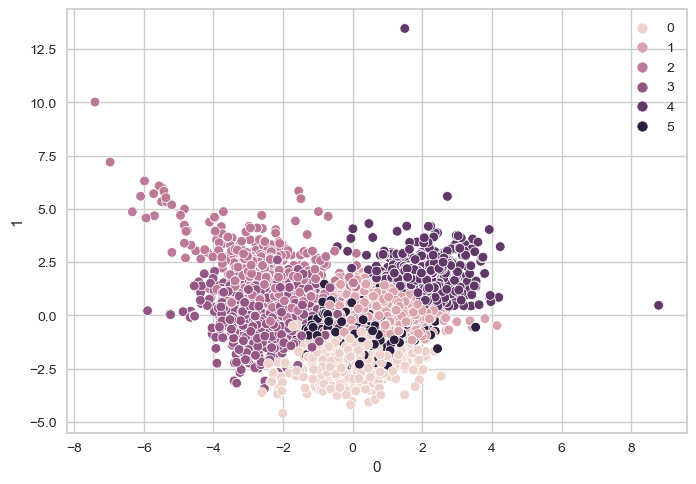

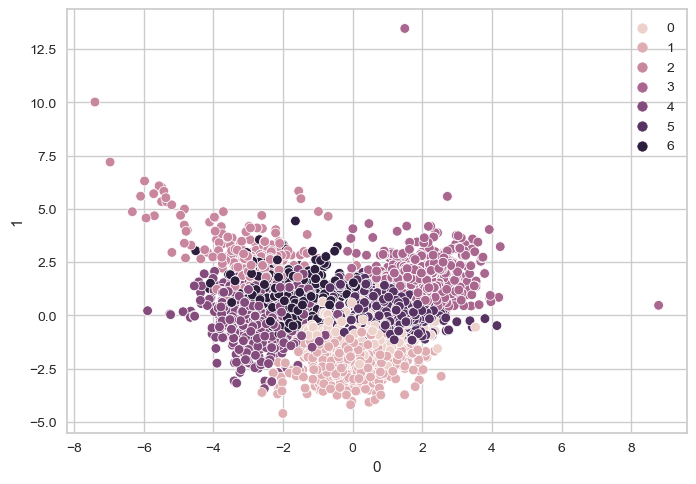

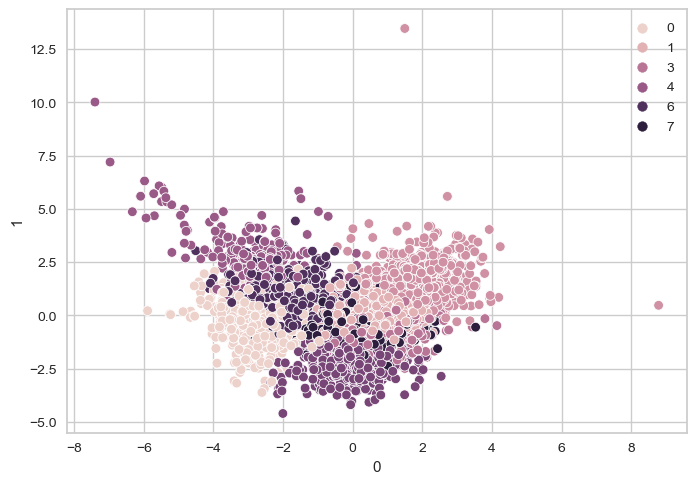

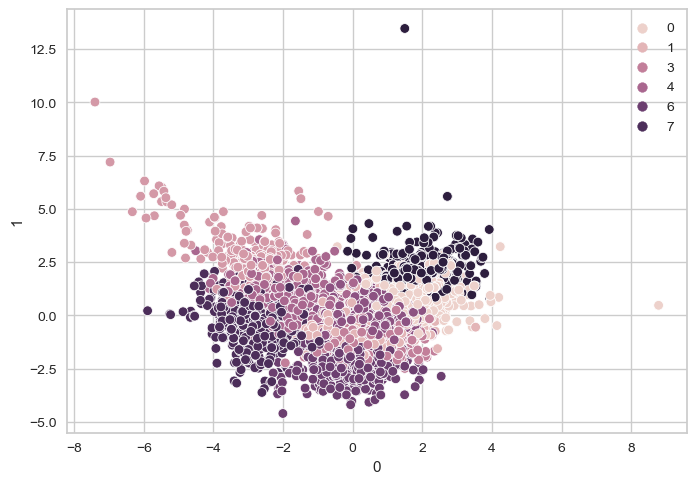

In [37]:
df_pca2 = pd.DataFrame(PCA(4).fit_transform(wine_scaled_df))

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 1, n_init = 25)
    kmeans.fit(df_pca)
    pca2_labels = kmeans.labels_
    sns.scatterplot(data = df_pca2, x = df_pca2.iloc[:, 0],y = df_pca2.iloc[:, 1], hue = pca2_labels)
    plt.show()

t-SNE - Quality

In [38]:
tsne_df['quality'] = wine['quality'].values

fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='quality')
fig.show()